# TP : Prédiction des frais d'assurance santé avec la régression et les KNN

## Objectif
Dans ce TP, vous allez explorer un jeu de données contenant des informations sur des personnes et leurs frais d'assurance. L'objectif est de prédire ces frais en utilisant des modèles de régression : régression linéaire et k plus proches voisins (KNN). Vous allez également analyser l'impact du nombre de voisins sur la performance du modèle KNN.

# 1. Importation des bibliothèques
Importer les bibliothèques nécessaires pour manipuler les données, les visualiser et construire les modèles de machine learning.

In [2]:
import pandas as pd
import numpy as np
from collections import Counter

# 2. Chargement des données
Charger les données depuis le fichier insurance.csv disponible sur moodle.

In [3]:
file = pd.read_csv(r"insurance.csv")

# 3. Exploration des données
Analyser les premières lignes du dataset et quelques statistiques générales.

## Afficher les premières lignes du dataset

In [4]:
print(file.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


## Afficher des statistiques générales sur les variables numériques

In [5]:
print(file.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


## Vérifier les valeurs manquantes

In [6]:
print(file.isna().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


## Visualiser la distribution de la variable cible (charges) 

<Axes: ylabel='Frequency'>

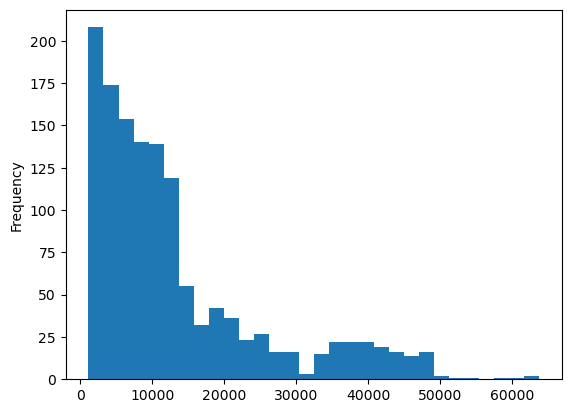

In [7]:
file["charges"].plot.hist(bins=30)

# 4. Prétraitement des données
### Encodage des variables catégorielles
Transformer les variables catégorielles en variables numériques avec `OrdinalEncoder`.

In [8]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
for i in ["sex", "smoker", "region"]:
    file[i] = enc.fit_transform(file[[i]])

print(file)

      age  sex     bmi  children  smoker  region      charges
0      19  0.0  27.900         0     1.0     3.0  16884.92400
1      18  1.0  33.770         1     0.0     2.0   1725.55230
2      28  1.0  33.000         3     0.0     2.0   4449.46200
3      33  1.0  22.705         0     0.0     1.0  21984.47061
4      32  1.0  28.880         0     0.0     1.0   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50  1.0  30.970         3     0.0     1.0  10600.54830
1334   18  0.0  31.920         0     0.0     0.0   2205.98080
1335   18  0.0  36.850         0     0.0     2.0   1629.83350
1336   21  0.0  25.800         0     0.0     3.0   2007.94500
1337   61  0.0  29.070         0     1.0     1.0  29141.36030

[1338 rows x 7 columns]


### Normalisation des variables numériques
Normaliser les variables numériques pour les mettre à l'échelle en utilisant `StandardScaler` ou `MinMaxScaler`

In [9]:
from sklearn.preprocessing import StandardScaler

sts = StandardScaler()
for i in ["age", "bmi", "children"]:
    file[i] = sts.fit_transform(file[[i]])

print(file)

           age  sex       bmi  children  smoker  region      charges
0    -1.438764  0.0 -0.453320 -0.908614     1.0     3.0  16884.92400
1    -1.509965  1.0  0.509621 -0.078767     0.0     2.0   1725.55230
2    -0.797954  1.0  0.383307  1.580926     0.0     2.0   4449.46200
3    -0.441948  1.0 -1.305531 -0.908614     0.0     1.0  21984.47061
4    -0.513149  1.0 -0.292556 -0.908614     0.0     1.0   3866.85520
...        ...  ...       ...       ...     ...     ...          ...
1333  0.768473  1.0  0.050297  1.580926     0.0     1.0  10600.54830
1334 -1.509965  0.0  0.206139 -0.908614     0.0     0.0   2205.98080
1335 -1.509965  0.0  1.014878 -0.908614     0.0     2.0   1629.83350
1336 -1.296362  0.0 -0.797813 -0.908614     0.0     3.0   2007.94500
1337  1.551686  0.0 -0.261388 -0.908614     1.0     1.0  29141.36030

[1338 rows x 7 columns]


### Construction du dataset final
Assembler les variables encodées et normalisées pour créer la matrice des caractéristiques `X` et la variable cible `y`.

In [10]:
X = file.iloc[:, :-1]
y = file.iloc[:, -1]

print(X)
print(y)

           age  sex       bmi  children  smoker  region
0    -1.438764  0.0 -0.453320 -0.908614     1.0     3.0
1    -1.509965  1.0  0.509621 -0.078767     0.0     2.0
2    -0.797954  1.0  0.383307  1.580926     0.0     2.0
3    -0.441948  1.0 -1.305531 -0.908614     0.0     1.0
4    -0.513149  1.0 -0.292556 -0.908614     0.0     1.0
...        ...  ...       ...       ...     ...     ...
1333  0.768473  1.0  0.050297  1.580926     0.0     1.0
1334 -1.509965  0.0  0.206139 -0.908614     0.0     0.0
1335 -1.509965  0.0  1.014878 -0.908614     0.0     2.0
1336 -1.296362  0.0 -0.797813 -0.908614     0.0     3.0
1337  1.551686  0.0 -0.261388 -0.908614     1.0     1.0

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


# 5. Division en ensembles d'entraînement et de test
Séparer les données en un ensemble d'entraînement (80%) et un ensemble de test (20%).

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=8964
)

# 6. Implémentation d'un modèle de régression linéaire
Créer et entraîner un modèle de régression linéaire.

In [12]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_predicted = linearRegression.predict(X_test)

# 7. Prédictions et évaluation du modèle linéaire
Évaluer les performances du modèle avec l'erreur quadratique moyenne (MSE) et le coefficient de détermination (R²) sur le dataset d'entrainement et de test. Que pensez-vous de la qualité de ce modèle?

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

print(mean_squared_error(y_test, y_predicted))
print(r2_score(y_test, y_predicted))

47458806.29682825
0.6804717203876025


# 8. Implémentation d'un modèle KNN
Créer, entraîner et évaluer un modèle KNN avec `k=5`.

In [14]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(5)
knn.fit(X_train, y_train)
y_predicted = knn.predict(X_test)

print(mean_squared_error(y_test, y_predicted))
print(r2_score(y_test, y_predicted))

41420653.36699556
0.7211250947189948


# 9. Étude de l'impact du nombre de voisins
Tester l'effet du nombre de voisins sur la performance du modèle KNN.
Vous devez produire un graphique qui affiche la MSE en ordonnées en fonction du nombre voisin (en abscisse). Les valeurs en entrainement et en test doivent être affichées

    n     MSE_train      MSE_test  R2_train   R2_test
0   1  0.000000e+00  5.563920e+07  1.000000  0.625395
1   3  2.080909e+07  3.849455e+07  0.857472  0.740826
2   5  2.817944e+07  4.142065e+07  0.806991  0.721125
3  10  4.027715e+07  5.670497e+07  0.724130  0.618220
4  20  5.510664e+07  6.659180e+07  0.622559  0.551654


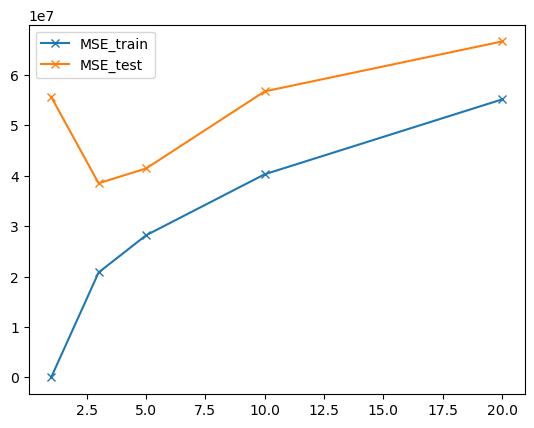

In [15]:
import matplotlib.pyplot as plt

plt.figure()

df = pd.DataFrame(columns=["n", "MSE_train", "MSE_test", "R2_train", "R2_test"]).astype(
    {
        "n": int,
        "MSE_train": float,
        "MSE_test": float,
        "R2_train": float,
        "R2_test": float,
    }
)

for i in [1, 3, 5, 10, 20]:
    knn = KNeighborsRegressor(i)
    knn.fit(X_train, y_train)
    y_train_predicted = knn.predict(X_train)
    y_test_predicted = knn.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_predicted)
    mse_test = mean_squared_error(y_test, y_test_predicted)
    r2_train = r2_score(y_train, y_train_predicted)
    r2_test = r2_score(y_test, y_test_predicted)

    df = pd.concat(
        [
            df,
            pd.DataFrame(
                [[i, mse_train, mse_test, r2_train, r2_test]], columns=df.columns
            ),
        ],
        ignore_index=True,
    )

print(df)

plt.plot(df["n"], df["MSE_train"], marker="x", label="MSE_train")
plt.plot(df["n"], df["MSE_test"], marker="x", label="MSE_test")
plt.legend()
plt.show()

# 10. Analyse des résultats
- Quelle est l'importance des différentes variables dans la prédiction ?
- Quel est le meilleur choix pour le paramètre `k` ?

# 11. Pour les plus rapides ou à faire à la maison
Améliorer l'analyse de paramètres précédentes pour répeter plusieurs fois les entraintements sur des splits train/test différents. Afficher sur le plot la moyenne et les écart-types obtenus sur 20 splits différents.

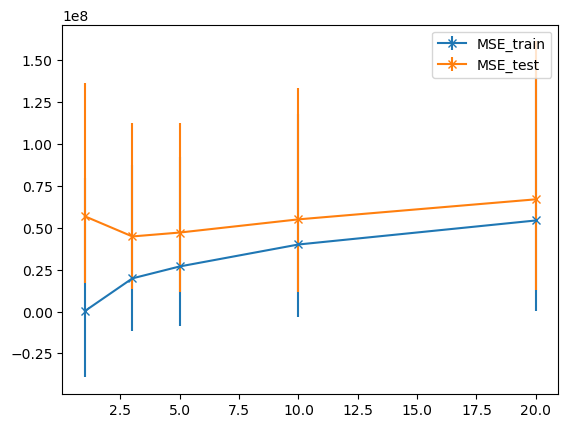

In [ ]:
plt.figure()

df = pd.DataFrame(
    columns=["Seed", "n", "MSE_train", "MSE_test", "R2_train", "R2_test"]
).astype(
    {
        "Seed": int,
        "n": int,
        "MSE_train": float,
        "MSE_test": float,
        "R2_train": float,
        "R2_test": float,
    }
)



for i in range(20):
    seed = 8964 - 20 + i

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed
    )


    for j in [1, 3, 5, 10, 20]:

        knn = KNeighborsRegressor(j)

        knn.fit(X_train, y_train)

        y_train_predicted = knn.predict(X_train)
        y_test_predicted = knn.predict(X_test)


        mse_train = mean_squared_error(y_train, y_train_predicted)
        mse_test = mean_squared_error(y_test, y_test_predicted)

        r2_train = r2_score(y_train, y_train_predicted)
        r2_test = r2_score(y_test, y_test_predicted)


        df = pd.concat(
            [
                df,
                pd.DataFrame(
                    [[seed, j, mse_train, mse_test, r2_train, r2_test]],
                    columns=df.columns,
                ),

            ],
            ignore_index=True,
        )



df_mean = df.groupby(["n"]).mean()
df_min = df.groupby(["n"]).min()
df_max = df.groupby(["n"]).max()
yerr_train = pd.concat([df_min["MSE_train"], df_max["MSE_train"]], axis=1)
yerr_test = pd.concat([df_min["MSE_test"], df_max["MSE_test"]], axis=1)

plt.errorbar(
    df_mean.index, df_mean["MSE_train"], yerr=yerr_test.T, marker="x", label="MSE_train"
)
plt.errorbar(
    df_mean.index, df_mean["MSE_test"], yerr=yerr_test.T, marker="x", label="MSE_test"
)


plt.legend()


plt.show()

# 12. Autres modèles
Tester d'autres modèles de regression linéaire "simples" tels que des modèles polynomiaux, Lasso, ElasticNet ou Ridge